## Conveyor Motor Maintenance Problem

The code demonstrates a simple approach to **monitoring the condition of a conveyor motor** in an industrial production line using synthetic sensor data. 

<img src="Motor.png" alt="Conveyor Motor" width="500">

In predictive maintenance, the goal is to **anticipate failures before they occur**, reducing unplanned downtime and maintenance costs. The motor is equipped with multiple sensors that measure early warning signs of failure:  

- **Vibration:** Minimum vibrations appear months before a failure.  
- **Noise:** Apparent abnormal noise is detected weeks before the failure.  
- **Temperature:** The motor starts heating up days before a fault occurs.  
- **Smoke:** The motor emits smoke minutes before the failure.  

The code performs the following steps:  

1. **Load sensor data:** The synthetic data collected over time for each sensor is read from a CSV file into a dataframe.  
2. **Visualize sensor signals:** All four sensor readings are plotted on a single graph, showing how the signals evolve over time.  
3. **Mark the fault event:** The exact moment when the motor fails is highlighted, allowing us to see the lead time provided by each sensor.  

This analysis allows maintenance teams to:  
- Identify which sensor gives the earliest indication of failure.  
- Observe the progression of degradation over time.  
- Plan maintenance activities proactively, avoiding costly production downtime.  

By using this type of data-driven monitoring, industrial facilities can shift from reactive to **predictive maintenance**, improving reliability, safety, and efficiency of the production line.



### Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

### Load the maintenance data from a local folder

In [3]:
# # Load the synthetic predictive maintenance data
# csv_path = 'data/predictive_maintenance_synthetic.csv'
# df = pd.read_csv(csv_path)

# # Display first rows
# df.head(10)

### Load data from a url

In [4]:
url = "https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/main/3_R&M/data/predictive_maintenance_synthetic.csv"

df = pd.read_csv(url)
df.head()

,time_min,vibration,noise,temperature,smoke
0,0,0.524836,27.223754,46.871905,-0.010921
1,1,0.493087,26.827503,46.288404,-0.005272
2,2,0.532384,28.149070,49.280594,-0.003327
3,3,0.576151,33.056665,50.300606,-0.014883
4,4,0.488292,26.748539,49.415477,0.007812


### Visualize the maintenance data

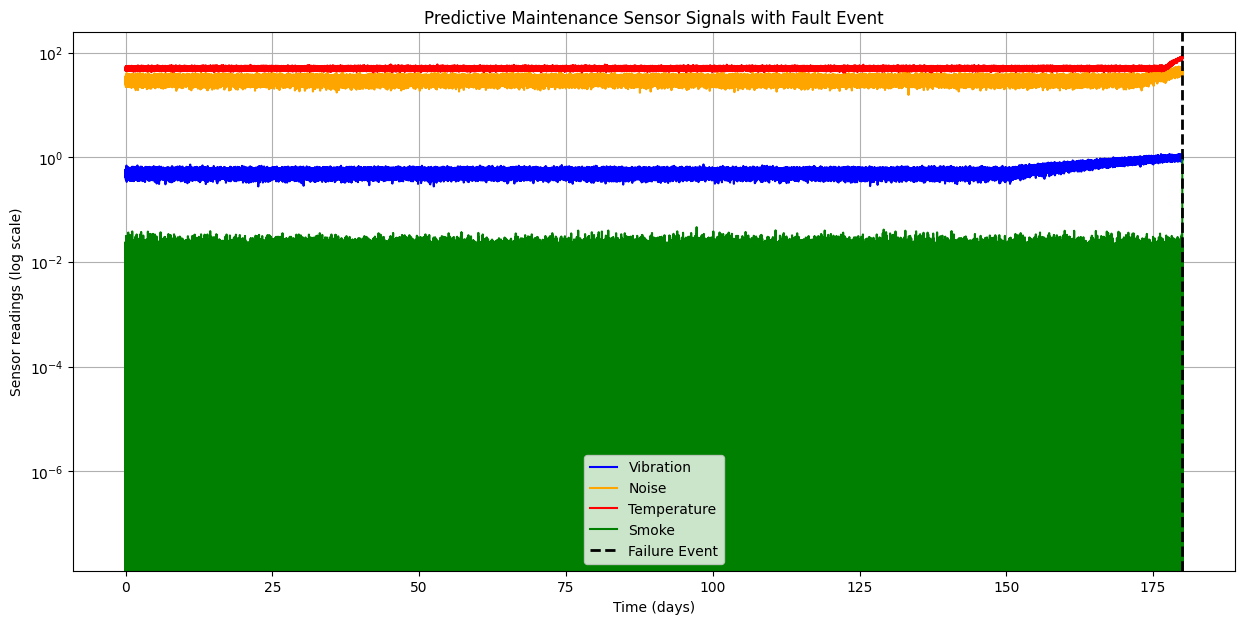

In [9]:
# Convert time from minutes to days
df['time_days'] = df['time_min'] / 1440

# Plot the 4 sensor signals
plt.figure(figsize=(15, 7))

# Plot each signal
plt.plot(df['time_days'], df['vibration'], label='Vibration', color='blue')
plt.plot(df['time_days'], df['noise'], label='Noise', color='orange')
plt.plot(df['time_days'], df['temperature'], label='Temperature', color='red')
plt.plot(df['time_days'], df['smoke'], label='Smoke', color='green')

# Highlight the failure event (last minute)
failure_time_days = df['time_days'].iloc[-1]
plt.axvline(x=failure_time_days, color='black', linestyle='--', linewidth=2, label='Failure Event')

# Labels and legend
plt.xlabel('Time (days)')
plt.ylabel('Sensor readings (log scale)')
plt.yscale('log')
plt.title('Predictive Maintenance Sensor Signals with Fault Event')
plt.legend()
plt.grid(True)
plt.show()

### Compute a simple 'health index' (HI) for the motor

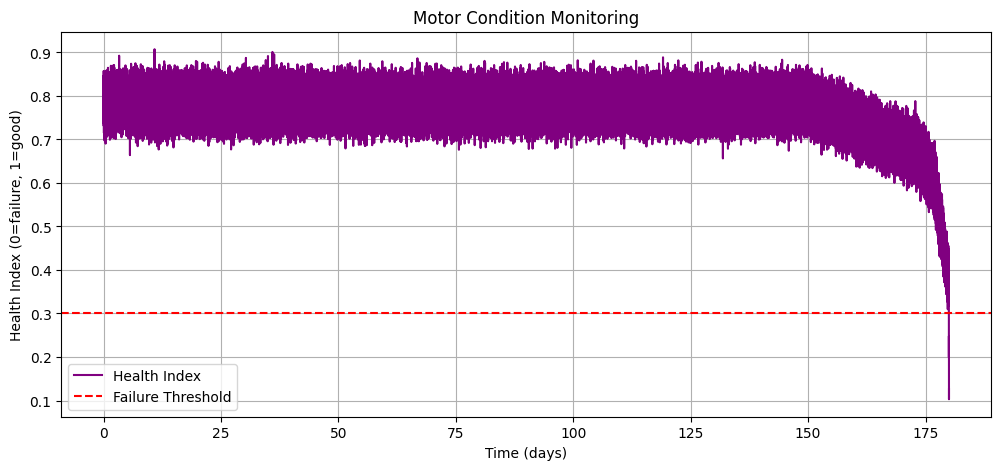

In [ ]:
# Normalize sensor data
sensor_cols = ['vibration', 'noise', 'temperature', 'smoke']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[sensor_cols])

# Health Index: 1 = good, 0 = failure
df['health_index'] = 1 - df_scaled.mean(axis=1)

# Plot Health Index over time
plt.figure(figsize=(12,5))
plt.plot(df['time_days'], df['health_index'], label='Health Index', color='purple')
plt.axhline(y=0.3, color='red', linestyle='--', label='Failure Threshold')
plt.xlabel('Time (days)')
plt.ylabel('Health Index (0=failure, 1=good)')
plt.title('Motor Condition Monitoring')
plt.legend()
plt.grid(True)
plt.show()

### Motor Condition Monitoring and RUL Prediction

Predicted failure time: 172.01 days
Current time: 170.00 days
Current Health Index: 0.699
Estimated Remaining Useful Life (RUL): 2.01 days


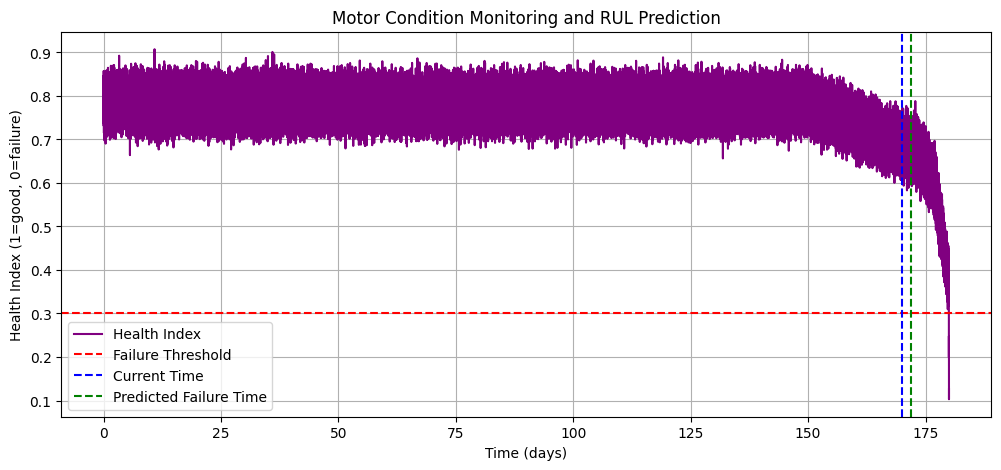

In [ ]:
# Use the last segment for fitting (e.g., last 30 days)
recent_df = df[df['time_days'] > (df['time_days'].max() - 3)]
X_recent = recent_df['time_days'].values.reshape(-1,1)
y_recent = recent_df['health_index'].values

# Fit linear regression
model = LinearRegression()
model.fit(X_recent, y_recent)

# Set current time
current_time = 170
current_hi = np.interp(current_time, df['time_days'], df['health_index'])

# Predict failure time (HI=1)
predicted_failure_time = (1 - model.intercept_) / model.coef_[0]
predicted_rul = max(predicted_failure_time - current_time, 0)

print(f"Predicted failure time: {predicted_failure_time:.2f} days")
print(f"Current time: {current_time:.2f} days")
print(f"Current Health Index: {current_hi:.3f}")
print(f"Estimated Remaining Useful Life (RUL): {predicted_rul:.2f} days")

# Plot updated RUL prediction
plt.figure(figsize=(12,5))
plt.plot(df['time_days'], df['health_index'], label='Health Index', color='purple')
plt.axhline(y=0.3, color='red', linestyle='--', label='Failure Threshold')
plt.axvline(x=current_time, color='blue', linestyle='--', label='Current Time')
plt.axvline(x=predicted_failure_time, color='green', linestyle='--', label='Predicted Failure Time')
plt.xlabel('Time (days)')
plt.ylabel('Health Index (1=good, 0=failure)')
plt.title('Motor Condition Monitoring and RUL Prediction')
plt.legend()
plt.grid(True)
plt.show()


### Summary of Predictive Maintenance Observations

From the analysis of the conveyor motor sensor data and condition monitoring results, the following observations can be made:

1. **Early indicators of failure:**  
   - Vibration increases were detected **months before failure**, indicating the onset of mechanical wear.  

   - Noise anomalies appeared **weeks before failure**, showing further degradation in the motor components.  

   - Temperature rises occurred **days before failure**, reflecting increased friction and energy losses. 

   - Smoke was observed **minutes before failure**, signaling imminent catastrophic fault.  

2. **Current motor condition:**  
   - The **Health Index** (or inversely, Failure Index) at the current time of **170 days** is **0.699**, indicating the motor is **approaching failure**. 

   - The motor is in a **critical degradation phase**, with sensors showing significant deviation from normal operation.

3. **RUL prediction and lead time:**  
   - The predicted failure time is **172.01 days**, meaning the **Remaining Useful Life (RUL) is approximately 2 days**.

   - This short lead time highlights the **urgency for maintenance intervention** to prevent unplanned downtime.  
   
4. **Value of condition monitoring:**  
   - Continuous monitoring of vibration, noise, temperature, and smoke provides a **quantitative method to estimate RUL** and anticipate failures.  

   - By acting on the RUL prediction, maintenance teams can perform **timely repairs or replacements**, reducing the risk of catastrophic failure and production interruptions.

**Conclusion:**  The predictive maintenance analysis demonstrates that the motor is in the **final stage of its operational life**, and immediate maintenance action is required. Regular sensor-based monitoring allows the plant to move from reactive to **data-driven predictive maintenance**, optimizing safety and operational efficiency.